In [4]:
%reload_ext blackcellmagic
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from qflow.wavefunctions import RBMWavefunction as RBM
from qflow.wavefunctions import RBMSymmetricWavefunction as SRBM
from qflow.wavefunctions import (
    JastrowOrion,
    SimpleGaussian,
    WavefunctionProduct,
    FixedWavefunction,
    Dnn,
)
from qflow.layers import DenseLayer
from qflow.layers.activations import sigmoid, tanh, relu, identity, exponential

from qflow.hamiltonians import (
    HarmonicOscillator,
    CoulombHarmonicOscillator,
)

from qflow.samplers import MetropolisSampler, ImportanceSampler
from qflow.optimizers import AdamOptimizer, SgdOptimizer
from qflow.training import train, EnergyCallback, SymmetryCallback, ParameterCallback
from qflow.statistics import compute_statistics_for_series


def plot_training(energies, symmetries, parameters):
    fig, (eax, sax, pax) = plt.subplots(ncols=3, figsize=(16, 4))
    eax.plot(energies, label=r"$\langle E_L\rangle$ [a.u]")
    sax.semilogx(symmetries, label=r"$S(\Psi)$")
    pax.semilogx(parameters)
    eax.legend()
    sax.legend()


# Ideal Harmonic Oscillator


In [2]:
H0 = HarmonicOscillator()


In [3]:
P, D = 2, 2  # Particles, dimensions
N = 2  # Hidden nodes
system = np.empty((P, D))


## SimpleGaussian with Jastrow

In [12]:
simple_gaussian = SimpleGaussian(alpha=0.5)
jastrow = JastrowOrion(beta=1, gamma=0)
psi = WavefunctionProduct(simple_gaussian, jastrow)
psi_sampler = ImportanceSampler(system, psi, step_size=0.1)

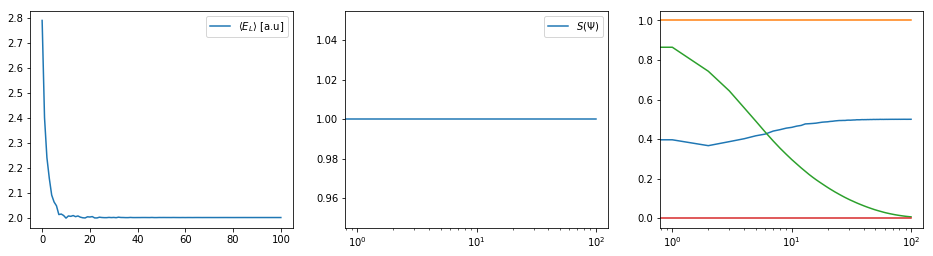

In [13]:
psi_energies = EnergyCallback(samples=5000)
psi_symmetries = SymmetryCallback(samples=100)
psi_parameters = ParameterCallback()

train(
    psi,
    H0,
    psi_sampler,
    iters=15000,
    samples=500,
    gamma=0,
    optimizer=AdamOptimizer(len(psi.parameters)),
    call_backs=(psi_energies, psi_symmetries, psi_parameters),
)
plot_training(psi_energies, psi_symmetries, psi_parameters)


In [14]:
compute_statistics_for_series(
    [H0.local_energy(psi_sampler.next_configuration(), psi) for _ in range(2 ** 20)],
    method="blocking",
)


{'mean': 1.9999989304811465,
 'max': 2.000100104863436,
 'min': 1.999795306419435,
 'var': 1.6633732128756831e-09,
 'std': 4.078447269336313e-05,
 'sem': 6.373351902887418e-07,
 'CI': (1.999997680957806, 2.000000180004487)}

## Non-symmetric RBM


In [15]:
rbm = RBM(P * D, N)
rbm_sampler = ImportanceSampler(system, rbm, step_size=0.1)


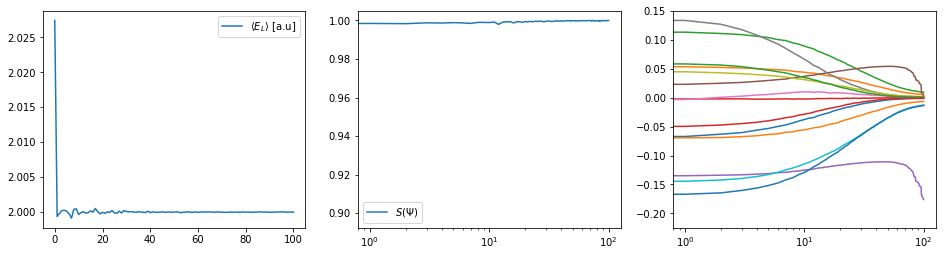

In [16]:
rbm_energies = EnergyCallback(samples=5000)
rbm_symmetries = SymmetryCallback(samples=10000)
rbm_parameters = ParameterCallback()

train(
    rbm,
    H0,
    rbm_sampler,
    iters=15000,
    samples=500,
    gamma=0,
    optimizer=AdamOptimizer(len(rbm.parameters)),
    call_backs=(rbm_energies, rbm_symmetries, rbm_parameters),
)
plot_training(rbm_energies, rbm_symmetries, rbm_parameters)


In [17]:
compute_statistics_for_series(
    [H0.local_energy(rbm_sampler.next_configuration(), rbm) for _ in range(2 ** 20)],
    method="blocking",
)


{'mean': 1.9999993954602326,
 'max': 2.000104085821734,
 'min': 1.9999362367861526,
 'var': 5.738855465018226e-10,
 'std': 2.3955908383983742e-05,
 'sem': 5.294850742193919e-07,
 'CI': (1.999998357074579, 2.0000004338458863)}

## Symmetric RBM


In [21]:
srbm = SRBM(P * D, N, D)
srbm_sampler = ImportanceSampler(system, srbm, step_size=0.1)


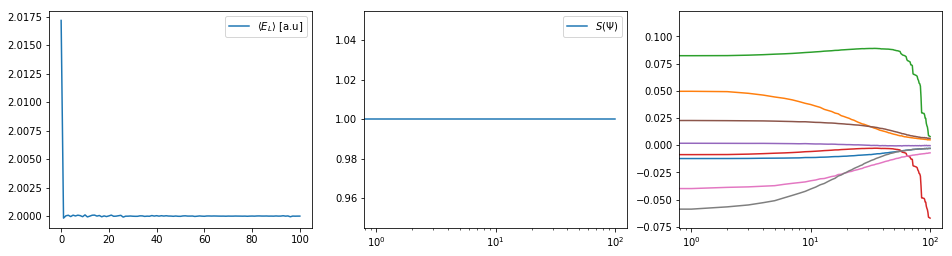

In [22]:
srbm_energies = EnergyCallback(samples=5000)
srbm_symmetries = SymmetryCallback(samples=10000)
srbm_parameters = ParameterCallback()

train(
    srbm,
    H0,
    srbm_sampler,
    iters=15000,
    samples=500,
    gamma=0,
    optimizer=AdamOptimizer(len(srbm.parameters)),
    call_backs=(srbm_energies, srbm_symmetries, srbm_parameters),
)
plot_training(srbm_energies, srbm_symmetries, srbm_parameters)

In [23]:
compute_statistics_for_series(
    [H0.local_energy(srbm_sampler.next_configuration(), srbm) for _ in range(2 ** 20)],
    method="blocking",
)


{'mean': 2.0000005655759576,
 'max': 2.0001119084945476,
 'min': 1.9999069910173422,
 'var': 8.849793060519679e-10,
 'std': 2.9748601749527117e-05,
 'sem': 6.575179848242564e-07,
 'CI': (1.9999992761019465, 2.0000018550499687)}

# Quantum Dots


In [5]:
H1 = CoulombHarmonicOscillator()


In [6]:
P, D = 2, 2  # Particles, dimensions
N = 4  # Hidden nodes
system = np.empty((P, D))


## SimpleGaussian with Jastrow

In [46]:
simple_gaussian = SimpleGaussian(alpha=0.5)
jastrow = JastrowOrion(beta=2, gamma=1.5)
psi = WavefunctionProduct(simple_gaussian, jastrow)
psi_sampler = ImportanceSampler(system, psi, step_size=0.1)

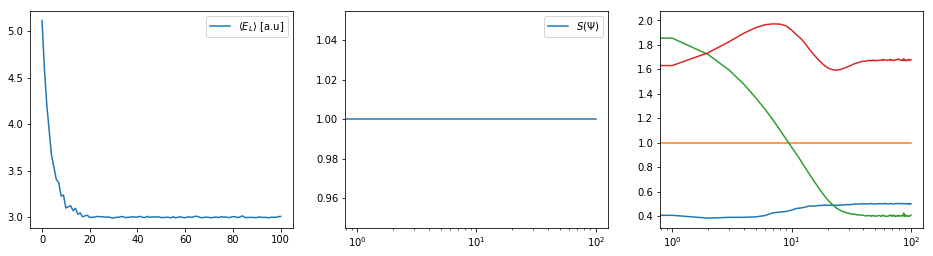

In [47]:
psi_energies = EnergyCallback(samples=5000)
psi_symmetries = SymmetryCallback(samples=100)
psi_parameters = ParameterCallback()

train(
    psi,
    H1,
    psi_sampler,
    iters=15000,
    samples=1000,
    gamma=0,
    optimizer=AdamOptimizer(len(psi.parameters)),
    call_backs=(psi_energies, psi_symmetries, psi_parameters),
)
plot_training(psi_energies, psi_symmetries, psi_parameters)


In [48]:
compute_statistics_for_series(
    [H1.local_energy(psi_sampler.next_configuration(), psi) for _ in range(2 ** 20)],
    method="blocking",
)


{'mean': 3.0015273249412244,
 'max': 3.1818315750457713,
 'min': 2.956796568129971,
 'var': 0.0002637948442385004,
 'std': 0.016241762350142314,
 'sem': 0.0003589832873617266,
 'CI': (3.000823314358782, 3.0022313355236667)}

## Non-symmetric RBM


In [50]:
rbm = RBM(P * D, N)
rbm_sampler = ImportanceSampler(system, rbm, step_size=0.1)


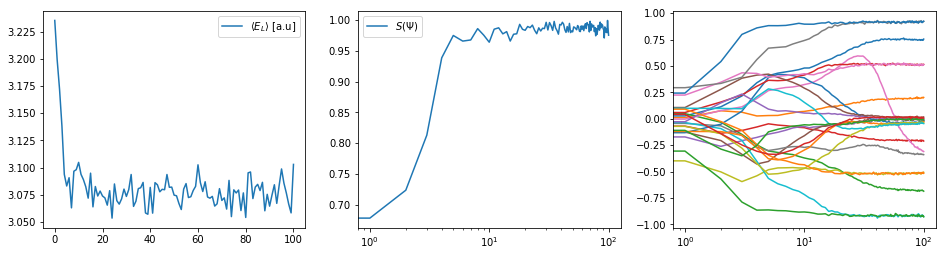

In [51]:
rbm_energies = EnergyCallback(samples=50000)
rbm_symmetries = SymmetryCallback(samples=10000)
rbm_parameters = ParameterCallback()

train(
    rbm,
    H1,
    rbm_sampler,
    iters=50000,
    samples=2000,
    gamma=0.0001,
    optimizer=AdamOptimizer(len(rbm.parameters)),
    call_backs=(rbm_energies, rbm_symmetries, rbm_parameters),
)
plot_training(rbm_energies, rbm_symmetries, rbm_parameters)


In [52]:
compute_statistics_for_series(
    [H1.local_energy(rbm_sampler.next_configuration(), rbm) for _ in range(2 ** 22)],
    method="blocking",
)


{'mean': 3.078867956287184,
 'max': 9.048676378481934,
 'min': 2.762270912047436,
 'var': 0.02522752413823053,
 'std': 0.15883174789137885,
 'sem': 0.0012409109005746136,
 'CI': (3.0764356359161145, 3.0813002766582533)}

In [53]:
a = rbm.parameters[: P * D]
b = rbm.parameters[P * D : P * D + N]
w = rbm.parameters[P * D + N :].reshape(P * D, N)
a, b, w


(array([ 0.75564302,  0.2035411 , -0.68531935, -0.20997417]),
 array([-0.01197322, -0.01849015, -0.309558  , -0.33923489]),
 array([[-5.06345653e-01, -9.24594770e-01, -1.99275253e-02,
         -2.69962561e-02],
        [-9.28093954e-01,  5.16338771e-01,  7.83430074e-04,
          1.70485967e-02],
        [ 5.14338484e-01,  9.24175271e-01, -3.76723225e-02,
         -4.47334276e-02],
        [ 9.25078237e-01, -5.15907464e-01, -8.48802158e-03,
          7.63140454e-03]]))

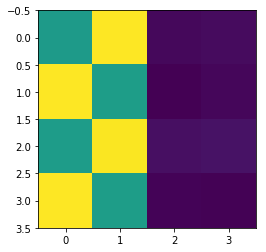

In [54]:
plt.imshow(np.abs(w))


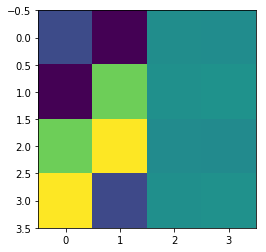

In [55]:
plt.imshow(w)


## Symmetric RBM


In [57]:
srbm = SRBM(P * D, N, D)
srbm_sampler = ImportanceSampler(system, srbm, step_size=0.1)
a = srbm.parameters[: D]
b = srbm.parameters[D : D + N]
w = srbm.parameters[D + N :].reshape(D, N)
a, b, w

(array([-0.0599195 , -0.13008949]),
 array([-0.27550309,  0.02746659, -0.02395897, -0.0349669 ]),
 array([[ 0.15736458,  0.11701058, -0.12320635,  0.020632  ],
        [ 0.08347588, -0.0008337 ,  0.14694931,  0.13454819]]))

In [31]:
srbm_energies = EnergyCallback(samples=10000, verbose=True)
srbm_symmetries = SymmetryCallback(samples=100)
srbm_parameters = ParameterCallback()

train(
    srbm,
    H1,
    srbm_sampler,
    iters=40000,
    samples=2000,
    gamma=0.001,
    optimizer=AdamOptimizer(len(srbm.parameters)),
    call_backs=(srbm_energies, srbm_symmetries, srbm_parameters),
)


EnergyCallback(iter=0): 3.3423631859059824
EnergyCallback(iter=400): 3.322812319807335
EnergyCallback(iter=800): 3.2825225168276893
EnergyCallback(iter=1200): 3.2819958290053144
EnergyCallback(iter=1600): 3.2977280569058625
EnergyCallback(iter=2000): 3.221348468275243
EnergyCallback(iter=2400): 3.2532204890873198
EnergyCallback(iter=2800): 3.263309732477277
EnergyCallback(iter=3200): 3.2640204281384957
EnergyCallback(iter=3600): 3.29605716645038
EnergyCallback(iter=4000): 3.2699984950918974
EnergyCallback(iter=4400): 3.296365342076279
EnergyCallback(iter=4800): 3.2336486816426793
EnergyCallback(iter=5200): 3.210346195329382
EnergyCallback(iter=5600): 3.2521153326150087
EnergyCallback(iter=6000): 3.277841091579697
EnergyCallback(iter=6400): 3.282805240937354
EnergyCallback(iter=6800): 3.236058340420383
EnergyCallback(iter=7200): 3.209212832058811
EnergyCallback(iter=7600): 3.298048943226818
EnergyCallback(iter=8000): 3.286299620346715
EnergyCallback(iter=8400): 3.197315153231962
EnergyC

KeyboardInterrupt: 

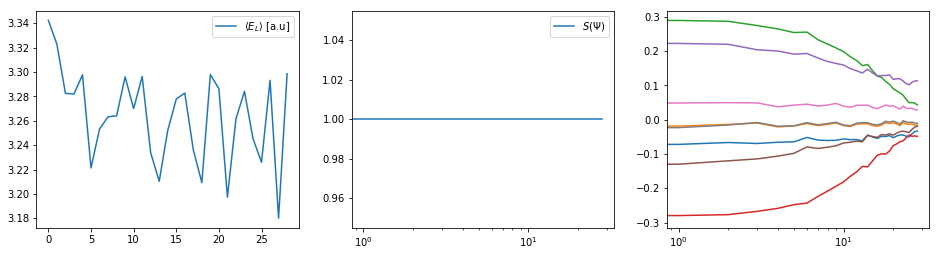

In [32]:
fig, (eax, sax, pax) = plt.subplots(ncols=3, figsize=(16, 4))
eax.plot(srbm_energies, label=r"$\langle E_L\rangle$ [a.u]")
sax.semilogx(srbm_symmetries, label=r"$S(\Psi)$")
pax.semilogx(srbm_parameters)
eax.legend()
sax.legend()
plt.show()


In [33]:
compute_statistics_for_series(
    [H1.local_energy(srbm_sampler.next_configuration(), srbm) for _ in range(2 ** 20)],
    method="blocking",
)


{'mean': 3.2511304913786083,
 'max': 7.9761983699563945,
 'min': 2.604826705999042,
 'var': 0.06467818398462946,
 'std': 0.2543190594206999,
 'sem': 0.003974220467396699,
 'CI': (3.243338859424281, 3.2589221233329355)}

## Simple gaussian + Jastrow + DNN

In [10]:
simple_gaussian = SimpleGaussian(alpha=0.5)
jastrow = JastrowOrion(beta=2, gamma=1.5)
layers = [
    DenseLayer(P*D, 32, activation=tanh, scale_factor=0.001),
    DenseLayer(32, 16, activation=tanh),
    DenseLayer(16, 1, activation=exponential),
]
dnn = Dnn()
for l in layers:
    dnn.add_layer(l)
simple_and_jastrow = WavefunctionProduct(simple_gaussian, jastrow)
psi = WavefunctionProduct(simple_and_jastrow, dnn)
psi_sampler = ImportanceSampler(system, psi, step_size=0.1)

In [30]:
s = psi_sampler.next_configuration()

In [36]:
%timeit H1.local_energy(s, psi)

76.2 µs ± 1.59 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [37]:
%timeit H1.local_energy(s, simple_gaussian)

2.69 µs ± 119 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [38]:
%timeit H1.local_energy(s, jastrow)

2.76 µs ± 227 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [39]:
%timeit H1.local_energy(s, dnn)

48.6 µs ± 1.48 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


EnergyCallback(iter=0): 5.064143160666213
EnergyCallback(iter=150): 4.5981090091152526
EnergyCallback(iter=300): 4.244975096156259
EnergyCallback(iter=450): 3.8190334751838164
EnergyCallback(iter=600): 3.6115385393675337
EnergyCallback(iter=750): 3.5127188678153316
EnergyCallback(iter=900): 3.3793835150761513
EnergyCallback(iter=1050): 3.274190812960659
EnergyCallback(iter=1200): 3.249446820217353
EnergyCallback(iter=1350): 3.1772564314752185
EnergyCallback(iter=1500): 3.128175062998774
EnergyCallback(iter=1650): 3.1109599516715285
EnergyCallback(iter=1800): 3.108727445566955
EnergyCallback(iter=1950): 3.082510175571178
EnergyCallback(iter=2100): 3.0467498222945393
EnergyCallback(iter=2250): 3.0382028396995286
EnergyCallback(iter=2400): 3.0027287379529177
EnergyCallback(iter=2550): 3.0374146523092733
EnergyCallback(iter=2700): 3.004993977295975
EnergyCallback(iter=2850): 3.003176897930657
EnergyCallback(iter=3000): 3.0029624575460376
EnergyCallback(iter=3150): 3.0161326846339387
Energy

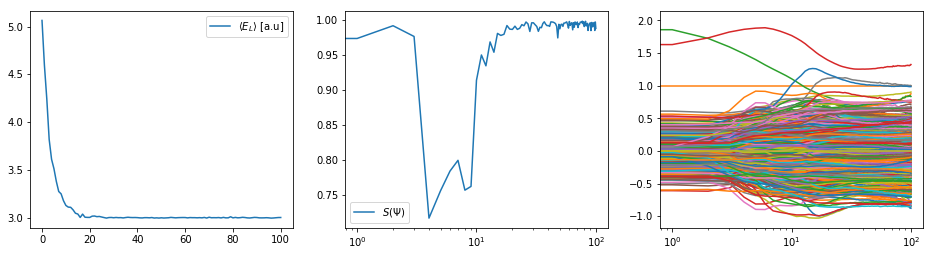

In [12]:
psi_energies = EnergyCallback(samples=5000, verbose=True)
psi_symmetries = SymmetryCallback(samples=100)
psi_parameters = ParameterCallback()

train(
    psi,
    H1,
    psi_sampler,
    iters=15000,
    samples=1000,
    gamma=0,
    optimizer=AdamOptimizer(len(psi.parameters)),
    call_backs=(psi_energies, psi_symmetries, psi_parameters),
)
plot_training(psi_energies, psi_symmetries, psi_parameters)


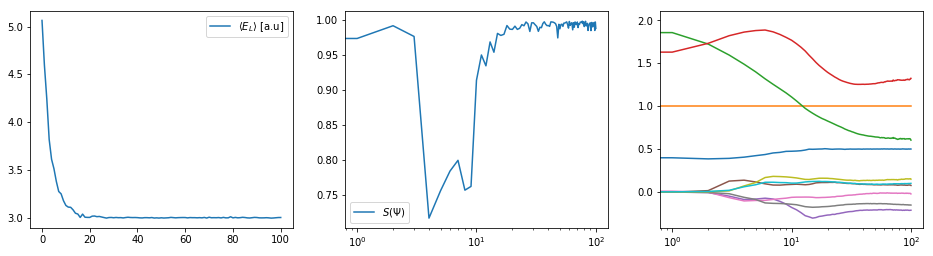

In [19]:
plot_training(psi_energies, psi_symmetries, np.array(psi_parameters)[:, :10])

In [24]:
compute_statistics_for_series(
    [H1.local_energy(psi_sampler.next_configuration(), psi) for _ in range(2 ** 21)],
    method="blocking",
)


{'mean': 2.999981552313362,
 'max': 3.9830328178782284,
 'min': 2.9360899513082344,
 'var': 0.00029693425152489173,
 'std': 0.017231780277292642,
 'sem': 0.000134627391980994,
 'CI': (2.9997176679781794, 3.000245436648545)}

In [25]:
abs(3 - 2.999981552313362)

1.8447686637834693e-05

In [23]:
'%e'%abs(3 - 3.0015273249412244)

'1.527325e-03'

In [40]:
from ipypara

/Users/bendik/.local/share/virtualenvs/thesis-JziQwHCu/lib/python3.7/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


AttributeError: Client